# erthaos-23

### README

Der Code stellt einen digitalen Assistent für die automatische Erkennung der gesuchten Motive.

Anpassbare Zeilen:

(#3 und #103) Pfad zu der eingabedatei.

(#5 und #105) Subkorpus anpassen (falls vorhanden, wenn nicht leer lassen '')

(#6 und #106) Der Attributwert bestimmt die Herkunft der zu analysierenden Textgruppe (des Repertoires). Die Filter können mit den 'or' und 'and' Operatoren ergänzt werden, z. B.:  

if ('deu' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']

    or 'ita' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']): 

(#34) NLTK-Stoppwortliste mit händisch eingetragene Wortformen ergänzen.
 
(#37) NLTK-Stoppwortliste für die bestimmte Sprache.
    
(#60) Anfrage anpassen. Die Werte von 'gesep_1' bis 'gesep_4' können nach der in der Motivliste ausgewälte Zeilen, oder ihre Bestandteilen ausgefült werden und anschließend in der Anfragezeile (#62) als Anfrage mit 'or' und/oder 'and' Opperatoren bestimmen.

(#78) Anzahl der Merkmale, die in der Visualisierung dargestellt werden sollen anpassen, sie darf nicht größer als gesamte Anzahl der Wörtersein (#77).

(#96) Schwelenwert anpassen. Dafür wird die Nummer des Merkmals mit minimal-positivem Koefizient gewählt (#95).
    
(#147-#157) Vorhersage durch Logistic Regression hat nur anschauliche Funktion um die Efektivität zwischen ihr und Vorhersage durch Cosine Similarity zu demonstrieren.

# Trainingsdaten aufbereiten und transformieren

In [1]:
maerchen = ""  #1 Eine leere Zeichenkette, in der Daten für Märchen gesammelt werden.
import xml.etree.ElementTree as ET  #2 Importieren der ElementTree-Bibliothek zum Parsen von XML.
root_node = ET.parse('Textkopus.xml').getroot()  #3 Parsen der XML-Datei und Zugriff auf das Wurzelelement.
never_saved = True  #4 Ein boolean-Wert, der angibt, ob Daten bereits gespeichert wurden oder nicht.
#5 Iteration durch jedes 'text'-Element in der XML-Datei.
for corp in root_node.findall (".//{http://www.tei-c.org/ns/1.0}teiCorpus"):
    if "" in corp.attrib["n"]:
        for ganze in corp.findall(".//{http://www.tei-c.org/ns/1.0}text"):
            #6 Überprüfung, ob das Attribut 'x' in der 'id'-Eigenschaft des 'text'-Elements vorhanden ist.
            if ('zyx_' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']):
                #7 Iteration durch jeden Absatz im 'body' des 'text'-Elements.
                for body in ganze.findall(".//{http://www.tei-c.org/ns/1.0}body"):
                    for absatz in body.findall(".//{http://www.tei-c.org/ns/1.0}p"):
                        #8 Iteration durch jede 'seg'-Phrase im Absatz.
                        for phrase in absatz.findall(".//{http://www.tei-c.org/ns/1.0}seg"):
                            #9 Extrahieren von Labels und Inhalten aus den Attributen und dem Text der Phrase.
                            labela = phrase.attrib['{www.dglab.uni-jena.de/vmf/a}ana']
                            labelb1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b1}ana']
                            labelb2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b2}ana']
                            labelb3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b3}ana']
                            labelb4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b4}ana']
                            labelb5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b5}ana']
                            labelc1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c1}ana']
                            labelc2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c2}ana']
                            labelc3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c3}ana']
                            labelc4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c4}ana']
                            labelc5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c5}ana']
                            labeld = phrase.attrib['{www.dglab.uni-jena.de/vmf/d}ana']
                            #10 Die Quelle wird aus dem Attribut 'id' der 'ganze'-Schleife extrahiert.
                            quelle = ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']
                            #11 Der Inhalt wird in Kleinbuchstaben umgewandelt und formatiert.
                            inhalt = (phrase.text.lower().strip().replace('|','').replace(':','').replace("ä","ae")
                                      .replace("ü","ue").replace("ö","oe").replace("ß","ss").replace(",","")
                                      .replace("«","").replace("»","").replace(".","").replace('=',' ').replace(";","")
                                      .replace('"',"").replace("?","").replace("!","").replace("á","a").replace(",","")
                                      .replace("\t"," ").replace("'","").replace("‹","").replace("›","").replace("-"," ")
                                      .replace("'('","").replace("')'","").replace('>','').replace("    "," ")
                                      .replace("   "," ").replace("  "," ").replace('–','').replace('—','').replace('<','')
                                      .replace("Â", "A").replace("ø", "oe").replace('“','').replace('„','').replace('(','')
                                      .replace(')','').replace('*','').replace("\n","\n")
                                      .replace("'''",""))
                            #12 Überprüfung, ob labela mit 'a' beginnt und nicht gleich 'N' ist.
                            if labela.startswith('a') and labela != 'N':
                                    #13 Konstruktion des Datensatzes für das Märchen und Anhängen an die 'maerchen'-Zeichenkette.
                                    maerchen += (quelle+','+labela+','+labelb1+','+labelc1+','+labelb2+','+labelc2+','+
                                                 labelb3+','+labelc3+','+labelb4+','+labelc4+','+labelb5+','+labelc5+','+
                                                 labeld+','+inhalt+',0'+'\n')                       
with open("text.csv", 'w', encoding='utf-8') as f:
     #14 Schreiben der Kopfzeile in die CSV-Datei.
    f.write('quelle,labela,labelb1,labelc1,labelb2,labelc2,labelb3,labelc3,labelb4,labelc4,labelb5,labelc5,labeld,inhalt,index_binar')
    f.write('\n')
    #15 Schreiben der gesammelten Daten in die CSV-Datei.
    f.write(maerchen)

In [2]:
#16 leere Zeichenfolge, die später mit den gewünschten Daten gefüllt werden
abcd1="" 
abcd2="" 
abcd3=""  
abcd4=""  
abcd5=""  

import pandas as pd  
from collections import Counter

#17 Lesen der CSV-Datei und Laden der Daten in ein Pandas DataFrame
df = pd.read_csv('text.csv',  encoding='utf-8')

#18.1 Hinzufügen von Daten zu den entsprechenden Variablen abcd1 bis abcd5
#18.2 Hier werden die Daten aus verschiedenen Spalten des DataFrame kombiniert
abcd1 += df.quelle+','+df.labela+':'+df.labelb1+':'+df.labelc1+':'+df.labeld+':'+','+df.inhalt+',0'
abcd2 += df.quelle+','+df.labela+':'+df.labelb2+':'+df.labelc2+':'+df.labeld+':'+','+df.inhalt+',0'
abcd3 += df.quelle+','+df.labela+':'+df.labelb3+':'+df.labelc3+':'+df.labeld+':'+','+df.inhalt+',0'
abcd4 += df.quelle+','+df.labela+':'+df.labelb4+':'+df.labelc4+':'+df.labeld+':'+','+df.inhalt+',0'
abcd5 += df.quelle+','+df.labela+':'+df.labelb5+':'+df.labelc5+':'+df.labeld+':'+','+df.inhalt+',0'

#19 Zusammenführen der Daten aus den Variablen abcd1 bis abcd5
recorded=(abcd1+'\n'+abcd2+'\n'+abcd3+'\n'+abcd4+'\n'+abcd5+'\n')

#20 Schreiben der kombinierten Daten in eine neue CSV-Datei
with open("text_aw.csv", 'w', encoding='utf-8') as w:
    #21 Schreiben der Kopfzeile
    w.write('quelle,index_string,inhalt,index_binar\n')
    #22 Schreiben der vordefinierten Zeile mit Dummy-Daten
    w.write('000:ballast,ballast,ballast,0\n')
    #23 Schreiben der kombinierten Daten und Schließen der Datei
    w.write("".join(recorded))
    w.close()

In [3]:
import csv  

mom=[]  #24 Eine leere Liste zum Speichern der Zeilen, die bestimmten Kriterien entsprechen

#25 Lesen der CSV-Datei 'text_aw.csv'
with open('text_aw.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f) 
    #26 Iteration über jede Zeile in der CSV-Datei
    for line in reader:
        #27 Überprüfen, ob die Zeile nicht das Muster ':N:' in der zweiten Spalte enthält
        if ':N:' not in line[1]:
            #28 Wenn das Muster nicht vorhanden ist, wird die Zeile der Liste 'mom' hinzugefügt
            mom.append(line)

#29 Kopieren der Datei text_ax.txt
import shutil, os
with open ('text_ax.txt', 'wt', encoding='utf-8') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(mom)

#30 Öffnen der Datei text_ax.txt zum Lesen
with open('text_ax.txt', 'r', encoding='utf-8') as file:
    #31 Lesen des gesamten Inhalts der Datei
    filedata = file.read()

#32 Bearbeiten des Dateiinhalts, um das gewünschte Format zu erzielen
filedata = (filedata.replace(']","[', "\n").replace('"[','').replace(']"','')
            .replace(" '","").replace("'",""))

#33 Schreiben des bearbeiteten Inhalts in eine neue CSV-Datei text_ay.csv
with open('text_ay.csv', 'w', encoding='utf-8') as file:
    file.write(filedata)

In [4]:
custom_stop_word_list=['']  #34 Eine leere Liste, um benutzerdefinierte Stoppwörter zu speichern

import nltk
nltk.download('stopwords')  #35 Herunterladen der Stoppwortliste aus der NLTK-Datenbank

from nltk.corpus import stopwords  #36 Importieren der Stoppwortliste aus NLTK
NLTK_stop_words_list=stopwords.words('german')  #37 Laden der Stoppwortliste für die bestimmte Sprache
stpw = custom_stop_word_list + NLTK_stop_words_list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xe78diq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#38 Funktion zur Filterung eines CSV-Datensatzes und Zusammenführung mehrfacher Inhalte in eine Zeile
def filter_csv(input_file, output_file):
    data_to_write = []  #39 Liste zum Speichern der zu schreibenden Daten
    with open(input_file, 'r', newline='') as csvfile:  #40 Öffnen der Eingabedatei im Lesemodus
        reader = csv.reader(csvfile)  #41 Erstellen eines CSV-Lesers
        data = list(reader)  #42 Lesen aller Daten in eine Liste
        processed_values = {}  #43 Dictionary zur Nachverfolgung bereits verarbeiteter Inhalte und deren aggregierten Inhalte
        
        for row in data:  #44 Iteration über jede Zeile der Daten
            if len(row) < 4:  #45 Sicherstellen, dass die Zeile genügend Spalten hat
                continue  #46 Zeile überspringen, wenn sie nicht genügend Spalten hat
            content_key = row[2]  #47 Inhalt aus Spalte 3 als Schlüssel verwenden
            if content_key not in processed_values:  #48 Überprüfen, ob der Inhalt noch nicht verarbeitet wurde
                processed_values[content_key] = row  #49 Zeile als verarbeitet markieren und speichern
            else:
                #50 Ergänzen des Inhalts in Spalte 2 der bereits gespeicherten Zeile
                processed_values[content_key][1] += ' ' + row[1]
        
    data_to_write = list(processed_values.values())  #51 Alle verarbeiteten Zeilen in eine Liste umwandeln
    
    with open(output_file, 'w', newline='') as csvfile:  #52 Öffnen der Ausgabedatei im Schreibmodus
        csvfile.write('\n')  #53 Neue Zeile nach der Header-Zeile
        writer = csv.writer(csvfile)  #54 Erstellen eines CSV-Schreibers
        writer.writerows(data_to_write)  #55 Schreiben der gefilterten Daten

#56 Beispielaufruf der Funktion:
filter_csv('text_ay.csv', 'text_az.csv')

In [6]:
import pandas as pd  
from collections import Counter

#57 Lesen der CSV-Dateien 'text_az.csv' und Laden der Daten in eine Pandas DataFrame 
df = pd.read_csv('text_az.csv',  encoding='utf-8')
#58 Zählen der Vorkommen jeder Zeichenfolge in der Spalte 'index_string'
indexliste = Counter(df.index_string)

#59 Ausgabe der einzigartigen Zeichenfolgen in der Spalte 'index_string'
print(*indexliste, sep='\n')

ballast
a551:h:KRANKHEIT:rHH:
a551:F:Zu_Beauftragungen_anregen:rHH_rVB:
a551:F:HEILMITTEL_besorgen:rHD_rHH_fHD: a551:F:VERTRAG_abschließen:rHD_rHH_fHD:
a551:H:Ortswechsel_durchführen:rHD_rST: a551:HF:Gegen_ein_Tier_kämpfen:rHD_rST: a551:HF:Der_VERLOCKUNG_nachgehen:rHD_rST: a551:HF:PFÖRTNER_täuschen:rHD_rST: a551:HF:HEILMITTEL_erfassen:rHD_rST:
a551:H:Zweikampf:rHD_fHF:
a551:f:VERLOCKUNG:rHD_fHF: a551:H:Der_VERLOCKUNG_nachgehen:rHD_fHF:
a551:H:PFÖRTNER_täuschen:rHD_fHF: a551:H:PFÖRTNER_entkommen:rHD_fHF:
a551:H:Erlösung:rHD_rBZ_rZO: a551:H:HEILMITTEL_erfassen:rHD_rBZ_rZO:
a551:H:HEILMITTEL_besorgen:rHD_rHH: a551:H:Auf_dem_VERTRAG_bestehen:rHD_rHH: a551:H:Heiraten:rHD_rHH:
a551:f:Zu_Beauftragungen_anregen:rHH_rVB:
a551:F:HEILMITTEL_besorgen:rHH_fHD:
a551:f:AMUSEMENT:fHD_fVB: a551:h:Dem_AMUSEMENT_nachgehen:fHD_fVB: a551:f:FREIHEITSBERAUBUNG:fHD_fVB:
a551:H:Um_einen_Auftrag_werben:rHD_rHH:
a551:f:AMUSEMENT:rHD_fVB: a551:H:Dem_AMUSEMENT_nachgehen:rHD_fVB:
a551:H:Ortswechsel_durchführen:rHD_

In [7]:
#60 Definieren der Variablen
gesep_1 ="a551"
gesep_2 ="h:KRANKHEIT:"
gesep_3 = ""
gesep_4 = ""

In [8]:
#61 Iteration über die Zeilen des DataFrames df
for i, gesuchte_label in enumerate(df.index_string):
    
    #62 Überprüfen, ob gesep_a-d in der aktuellen Zeile gesuchte_label vorhanden ist
    if gesep_1 in gesuchte_label and gesep_2 in gesuchte_label:# or gesep_3 in gesuchte_label or gesep_4 in gesuchte_label:
        print(i, gesuchte_label)
        #63 Wenn gesep_1-4 gefunden wurde, markiere die entsprechende Zeile in der Spalte 'index_binar' als '1'
        df.index_binar.iloc[i]='1'

#64 Speichern des aktualisierten DataFrames in einer CSV-Datei 'text_lab.csv'
df.to_csv('text_az.csv', encoding='utf-8', index=False)

1 a551:h:KRANKHEIT:rHH:
11 a551:h:KRANKHEIT:rHH:
81 a551:h:KRANKHEIT:rHH:
113 a551:h:KRANKHEIT:rHH:
159 a551:h:KRANKHEIT:rHH_rVB: a551:F:HEILMITTEL_besorgen:rHH_rVB:
172 a551:h:KRANKHEIT:rHH:
192 a551:h:KRANKHEIT:rHH:
225 a551:h:KRANKHEIT:rHH:


C:\Users\xe78diq\AppData\Local\Temp\ipykernel_13780\3108836473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.index_binar.iloc[i]='1'


In [9]:
#65 Lesen der CSV-Datei 'text_lab.csv' und Laden der Daten in ein Pandas DataFrame
df = pd.read_csv('text_az.csv',  encoding='utf-8')

#66 Extrahieren der Trainingsdaten X_train und der Labels y_train
X_train = df['inhalt']  # Inhalt der Texte
y_train = df['index_binar']  # Binäre Indikatoren

#67 Zählen der Vorkommen jeder Binärklasse in der Spalte 'index_binar'
indexliste = Counter(df.index_binar)

#68 Ausgabe der Anzahl der Vorkommen jeder Binärklasse
print(indexliste)

Counter({0: 257, 1: 8})


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import GridSearchCV  
from sklearn.pipeline import make_pipeline  

#69 Definieren der Pipeline mit einem TF-IDF-Vektorisierer und einem logistischen Regressionsmodell
pipe = make_pipeline(TfidfVectorizer(min_df=3, stop_words=stpw, ngram_range=(1,1), norm=None), 
                     LogisticRegression())

#70 Definieren des Rastersuchgitters für den Regularisierungsparameter C des logistischen Regressionsmodells
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}     

#71 Erstellen eines Rastersuchobjekts mit der Pipeline und dem Rastersuchgitter, das auf 5-facher Kreuzvalidierung basiert
grid = GridSearchCV(pipe, param_grid, cv=5)

#72 Anpassen der Rastersuche an die Trainingsdaten
grid.fit(X_train, y_train)

#73 Drucken des besten Scores aus der Kreuzvalidierung
print("Bester Score aus der Kreuzvalidierung: {:.2f}".format(grid.best_score_))

Bester Score aus der Kreuzvalidierung: 0.97


In [11]:
import numpy as np

#74 Extrahieren des TF-IDF-Vektorisierers aus dem besten Schätzschritt des Gittersuchlaufs
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

#75 Ermitteln des maximalen TF-IDF-Werts für jedes Merkmal
max_value = vectorizer.transform(X_train).max(axis=0).toarray().ravel()

#76 Sortieren der Merkmale nach ihren TF-IDF-Werten
sorted_by_tfidf = max_value.argsort()

#77 Extrahieren der Merkmalsnamen aus dem Vektorisierer
feature_names = np.array(vectorizer.get_feature_names_out())
print("Gesamte Anzahl der Wörter: {}".format(len(vectorizer.vocabulary_)))

Gesamte Anzahl der Wörter: 930


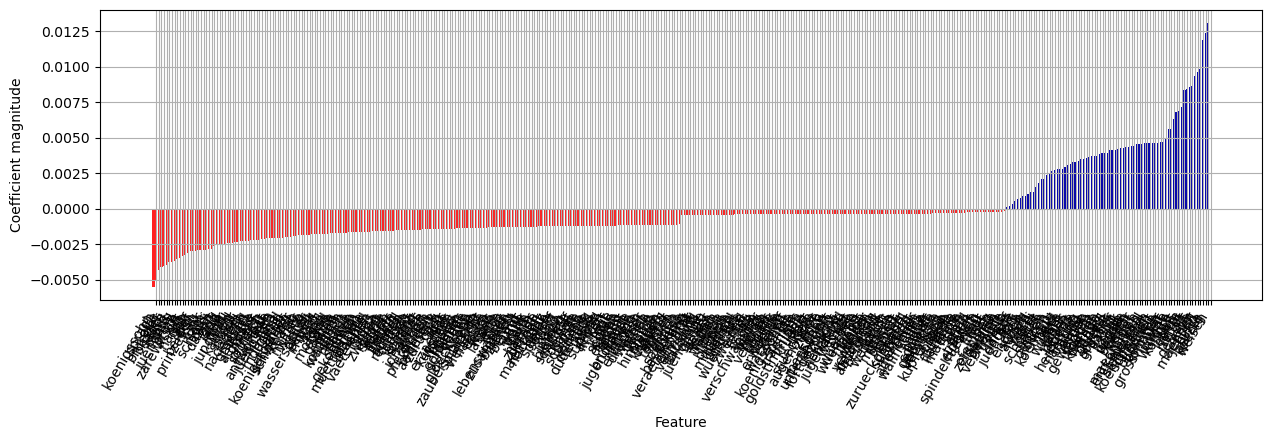

In [12]:
s_zahl = 200  #78 Anzahl der Merkmale, die in der Visualisierung dargestellt werden sollen

import matplotlib.pyplot as plt  
import mglearn

#79 Visualisieren der Koeffizienten des logistischen Regressionsmodells
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,  #80 Koeffizienten des Modells
    feature_names,  n_top_features=s_zahl  #81 Merkmalsnamen und Anzahl der Merkmale, die visualisiert werden sollen
)

#82 Anzeigen des Gitters in der Visualisierung
plt.grid()

#83 Anzeigen der Visualisierung
plt.show()
#plt.savefig(s_zahl+'.png', dpi=80)

In [13]:
#84 Extrahieren der Koeffizienten aus dem logistischen Regressionsmodell
gio = grid.best_estimator_.named_steps["logisticregression"].coef_[0]

#85 Sortieren der Indizes der Koeffizienten nach ihrer Größe
n_top = np.argsort(gio)

#86 Sortieren der Koeffizienten nach ihrer Größe
z_top = np.sort(gio)

#87 Extrahieren der Top-Merkmale mit den höchsten Koeffizienten
text_pos = feature_names[n_top[-s_zahl:]]
zahl_pos = gio[n_top[-s_zahl:]]

#88 Extrahieren der Top-Merkmale mit den niedrigsten Koeffizienten
text_neg = feature_names[n_top[0:s_zahl]]
zahl_neg = gio[n_top[0:s_zahl]]

#89 Ausgabe der positiven Merkmale und ihrer Koeffizienten
print("Positive Merkmale:\n{}".format(text_pos))

#89.1 Ausgabe der negativen Merkmale und ihrer Koeffizienten
# print("Negative Merkmale:\n{}".format(text_neg))

#89.2 Ausgabe der Koeffizienten der positiven Merkmale
# print("Positive coef:\n{}".format(zahl_pos))

#89.3 Ausgabe der Koeffizienten der negativen Merkmale
# print("Negative coef:\n{}".format(zahl_neg))

Positive Merkmale:
['beschluss' 'speise' 'veraenderung' 'empfing' 'that' 'vermocht' 'mitsamt'
 'tausend' 'nie' 'juenglinge' 'genau' 'aelter' 'legen' 'hufen' 'waffen'
 'neuen' 'gabe' 'blieben' 'bein' 'mittleren' 'namen' 'dreimal' 'daraus'
 'wuenschte' 'ehe' 'zweimal' 'reiter' 'lag' 'fische' 'verschwanden'
 'weder' 'wenig' 'herab' 'verloren' 'papier' 'schiffe' 'glueck' 'erwachte'
 'felde' 'wackeren' 'zwoelf' 'koenigssohne' 'los' 'speiste' 'traenkte'
 'ans' 'goldstimmigen' 'kruege' 'nase' 'fast' 'stuecklein' 'augenblicke'
 'zuvor' 'ehre' 'fisch' 'menschen' 'unterthanen' 'abkunft' 'fortgezogen'
 'licht' 'herrsche' 'nennst' 'jugendland' 'weckte' 'brust' 'eile'
 'wuerden' 'wuensche' 'mache' 'fliesst' 'weibe' 'wunder' 'vergelten'
 'belohnen' 'abschiede' 'beistand' 'trunk' 'naehe' 'weilchen' 'sechs'
 'mittlere' 'thaten' 'behielt' 'heisst' 'busen' 'zurueckgekehrt'
 'schnabel' 'bitten' 'herrscht' 'abenteuer' 'ohren' 'wallfisches' 'hilfe'
 'nahe' 'bisher' 'schlaeft' 'gehoerte' 'uebrigen' 'versuch

In [14]:
kfz = range(s_zahl)  #90 Erstellen einer Sequenz von Zahlen von 0 bis s_zahl-1
folgenum = 0  #91 Initialisieren des Zählers für die Folgennummer

#92 Iteration über die Zahlen in der Sequenz kfz
for x in kfz:
    folgenum += 1  #93 Inkrementieren der Folgennummer
    #97 Berechnen der Summe der Koeffizienten für das aktuelle Element in der Liste
    vollliste = zahl_pos[s_zahl - folgenum] + zahl_neg[s_zahl - folgenum]
    #94 Runden der Summe auf drei Dezimalstellen
    rundliste = round(vollliste, 3)
    #95 Ausgabe der gerundeten Summe und der aktuellen Zahl in der Sequenz
    print(rundliste, '-', x)

0.012 - 0
0.011 - 1
0.011 - 2
0.009 - 3
0.008 - 4
0.008 - 5
0.007 - 6
0.007 - 7
0.007 - 8
0.007 - 9
0.006 - 10
0.006 - 11
0.006 - 12
0.005 - 13
0.004 - 14
0.004 - 15
0.004 - 16
0.004 - 17
0.003 - 18
0.003 - 19
0.003 - 20
0.003 - 21
0.003 - 22
0.003 - 23
0.003 - 24
0.003 - 25
0.003 - 26
0.003 - 27
0.003 - 28
0.003 - 29
0.003 - 30
0.003 - 31
0.003 - 32
0.003 - 33
0.003 - 34
0.003 - 35
0.003 - 36
0.003 - 37
0.003 - 38
0.003 - 39
0.003 - 40
0.003 - 41
0.002 - 42
0.002 - 43
0.002 - 44
0.002 - 45
0.002 - 46
0.002 - 47
0.002 - 48
0.002 - 49
0.002 - 50
0.002 - 51
0.002 - 52
0.002 - 53
0.002 - 54
0.002 - 55
0.001 - 56
0.001 - 57
0.001 - 58
0.001 - 59
0.001 - 60
0.001 - 61
0.001 - 62
0.001 - 63
0.001 - 64
0.0 - 65
-0.0 - 66
-0.0 - 67
-0.0 - 68
-0.0 - 69
-0.0 - 70
-0.001 - 71
-0.001 - 72
-0.001 - 73
-0.001 - 74
-0.001 - 75
-0.001 - 76
-0.001 - 77
-0.002 - 78
-0.002 - 79
-0.002 - 80
-0.002 - 81
-0.002 - 82
-0.002 - 83
-0.002 - 84
-0.002 - 85
-0.002 - 86
-0.002 - 87
-0.002 - 88
-0.002 - 89
-0.002 -

In [15]:
#96 Schwelenwert bestimmen
sw=65

In [16]:
filename ='!_neu'  #97 Der Dateiname für die CSV-Datei (ohne Erweiterung)
tit = (text_pos[s_zahl-sw:s_zahl])  #102 Die Topmerkmale, die geschrieben werden soll

#98 Öffnen der CSV-Datei zum Schreiben ('wt' für Schreiben im Textmodus)
with open (filename+'.csv', 'wt', encoding='utf-8') as f:
    writer = csv.writer(f)  #99 Initialisieren des CSV-Schreibers
    writer.writerow(tit)  #100 Schreiben der Topmerkmalen in die CSV-Datei

# Messdaten aufbereiten

In [17]:
maerchen = ""  #101 Eine leere Zeichenkette, in der Daten für Märchen gesammelt werden.
import xml.etree.ElementTree as ET  #102 Importieren der ElementTree-Bibliothek zum Parsen von XML.
root_node = ET.parse('Textkorpus.xml').getroot()  #103 Parsen der XML-Datei und Zugriff auf das Wurzelelement.
never_saved = True  #104 Ein boolean-Wert, der angibt, ob Daten bereits gespeichert wurden oder nicht.
#105 Iteration durch jedes 'text'-Element in der XML-Datei.
for corp in root_node.findall (".//{http://www.tei-c.org/ns/1.0}teiCorpus"):
    if "" in corp.attrib["n"]:
        for ganze in corp.findall(".//{http://www.tei-c.org/ns/1.0}text"):
            #106 Überprüfung, ob das Attribut 'deu' in der 'id'-Eigenschaft des 'text'-Elements vorhanden ist.
            if ('dummy' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']):
                #107 Iteration durch jeden Absatz im 'body' des 'text'-Elements.
                for body in ganze.findall(".//{http://www.tei-c.org/ns/1.0}body"):
                    for absatz in body.findall(".//{http://www.tei-c.org/ns/1.0}p"):
                        #108 Iteration durch jede 'seg'-Phrase im Absatz.
                        for phrase in absatz.findall(".//{http://www.tei-c.org/ns/1.0}seg"):
                            #109 Extrahieren von Labels und Inhalten aus den Attributen und dem Text der Phrase.
                            labela = phrase.attrib['{www.dglab.uni-jena.de/vmf/a}ana']
                            labelb1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b1}ana']
                            labelb2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b2}ana']
                            labelb3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b3}ana']
                            labelb4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b4}ana']
                            labelb5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b5}ana']
                            labelc1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c1}ana']
                            labelc2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c2}ana']
                            labelc3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c3}ana']
                            labelc4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c4}ana']
                            labelc5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c5}ana']
                            labeld = phrase.attrib['{www.dglab.uni-jena.de/vmf/d}ana']
                            #110 Die Quelle wird aus dem Attribut 'id' der 'ganze'-Schleife extrahiert.
                            quelle = ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']
                            #111 Der Inhalt wird in Kleinbuchstaben umgewandelt und formatiert.
                            inhalt = (phrase.text.lower().strip().replace('|','').replace(':','').replace("ä","ae")
                                      .replace("ü","ue").replace("ö","oe").replace("ß","ss").replace(",","")
                                      .replace("«","").replace("»","").replace(".","").replace('=',' ').replace(";","")
                                      .replace('"',"").replace("?","").replace("!","").replace("á","a").replace(",","")
                                      .replace("\t"," ").replace("'","").replace("‹","").replace("›","").replace("-"," ")
                                      .replace("'('","").replace("')'","").replace('>','').replace("    "," ")
                                      .replace("   "," ").replace("  "," ").replace('–','').replace('—','').replace('<','')
                                      .replace("Â", "A").replace("ø", "oe").replace('“','').replace('„','').replace('(','')
                                      .replace(')','').replace('*','').replace("\n","\n")
                                      .replace("'''",""))
                            #112 Überprüfung, ob labela mit 'a' beginnt und nicht gleich 'N' ist.
                            if labela.startswith('N'):
                                    #113 Konstruktion des Datensatzes für das Märchen und Anhängen an die 'maerchen'-Zeichenkette.
                                    maerchen += (quelle+','+labela+','+labelb1+','+labelc1+','+labelb2+','+labelc2+','+
                                                 labelb3+','+labelc3+','+labelb4+','+labelc4+','+labelb5+','+labelc5+','+
                                                 labeld+','+inhalt+',0'+'\n')                       
with open("text.csv", 'w', encoding='utf-8') as f:
     #114 Schreiben der Kopfzeile in die CSV-Datei.
    f.write('quelle,labela,labelb1,labelc1,labelb2,labelc2,labelb3,labelc3,labelb4,labelc4,labelb5,labelc5,labeld,inhalt,index_binar')
    f.write('\n')
    #115 Schreiben der gesammelten Daten in die CSV-Datei.
    f.write(maerchen)

In [18]:
#116 Öffnen der CSV-Datei im Lesemodus und Lesen ihres Inhalts
with open(filename+'.csv', 'r', encoding='utf-8') as file:
    file_contents = file.read().replace(",", " ").replace("\n", "")  #117 Entfernen von Kommas und Zeilenumbrüchen

#118 Zusammenstellen des neuen Inhalts mit dem Dateinamen und zusätzlichen Metadaten
frt_contents = filename+',N,N,N,N,N,N,N,N,N,N,N,N'+','+file_contents+',0'

#119 Löschen der ursprünglichen CSV-Datei
import os 
os.remove(filename+'.csv')

In [19]:
row = [frt_contents]  #120 Erstellen einer neuen Zeile mit dem zusammengestellten Inhalt

#121 Öffnen der CSV-Datei im Lesemodus und Lesen der vorhandenen Zeilen
with open("text.csv", 'r', encoding='utf-8') as readFile:
    rd = csv.reader(readFile)  #122 Initialisieren des CSV-Lesers
    lines = list(rd)  #123 Lesen der Zeilen und Konvertieren in eine Liste

    #124 Einfügen der neuen Zeile an der zweiten Position in die Liste der Zeilen
    lines.insert(1, row)

#125 Öffnen der CSV-Datei im Schreibmodus und Schreiben der aktualisierten Zeilen
with open("text.csv", 'wt', newline='', encoding='utf-8') as writeFile:
    wt = csv.writer(writeFile)  #126 Initialisieren des CSV-Schreibers
    wt.writerows(lines)  #127 Schreiben der Zeilen in die Datei

#133 Öffnen der ursprünglichen und neuen CSV-Dateien zum Lesen bzw. Schreiben
fin = open('text.csv', 'r', encoding='utf-8')
fout = open('text_reich.csv', "wt", encoding='utf-8')

#128 Iteration über die Zeilen der ursprünglichen CSV-Datei
for kfz in fin:
    #129 Schreiben der Zeile in die neue Datei mit Entfernung bestimmter Zeichenfolgen
    fout.write(kfz.replace('"', ''))
#130 Schließen beider Dateien
fin.close()
fout.close()

In [20]:
#131 Funktion für die Beseitigung der leeren Datensätzen
def delete_records_with_empty_field(file_path, field_name):
    
    #132 Öffnen der CSV-Datei im Lese-Modus
    with open(file_path, 'r') as file:
        #133 Lesen der Daten als Liste von Dictionaries
        reader = csv.DictReader(file)
        rows = list(reader)

    #134 Überprüfen, ob das Feld in den Daten leer ist
    filtered_rows = [row for row in rows if row[field_name]]

    #135 Öffnen der CSV-Datei im Schreibmodus und Schreiben der verbleibenden Datensätze
    with open(file_path, 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=reader.fieldnames)
        writer.writeheader()
        writer.writerows(filtered_rows)

#136 Beispielaufruf der Funktion
file_path = 'text_reich.csv'  #137 Passe den Pfad zu deiner CSV-Datei an
field_name = 'inhalt'  #138 Passe den Namen des Feldes an, das überprüft werden soll
delete_records_with_empty_field(file_path, field_name)

In [21]:
t_corpus = []  #139 Eine leere Liste zum Speichern der Textdaten
df = pd.read_csv('text_reich.csv', encoding='utf-8')  #140 Einlesen der CSV-Datei in ein Pandas DataFrame
file = 'text_reich.csv'  #141 Der Dateiname der CSV-Datei

#142 Öffnen der CSV-Datei im Lesemodus und Extrahieren der Textdaten
with open(file, "rt", encoding='utf-8') as maerchen:
    maercho = df.inhalt  #143 Extrahieren der Spalte "inhalt" aus dem DataFrame
    reader = csv.reader(maercho)  #144 Initialisieren des CSV-Lesers
    for row in reader:
        lst = str(row)  #145 Konvertieren der gelesenen Zeile in eine Zeichenfolge
        t_corpus.append(lst)  #146 Hinzufügen der Zeichenfolge zur Liste der Textdaten

## Vorhersage durch Logistic Regression

In [22]:
#147 Vorhersagen für die Testdaten mit dem trainierten Modell durchführen
mod_pred = grid.predict(t_corpus)

#148 Iteration über die Indizes und Vorhersagen
for index, prediction in enumerate(mod_pred):
    #149 Überprüfen, ob die Vorhersage positiv ist
    if prediction == 1:
        #150 Ausgabe des Index und der Vorhersage für positiv bewertete Datensätze
        print('Positiv bewerteter Datensatz: {}'.format(index))

In [23]:
#151 Vorhersagen für die Testdaten mit der Methode `predict_proba` durchführen
all_pred = grid.predict_proba(t_corpus)

#152 Sortieren der Indizes der Testdaten basierend auf der Wahrscheinlichkeit positiver Vorhersagen in absteigender Reihenfolge
sort_index = np.flip(all_pred[:, 1].argsort())

#153 Iteration über die sortierten Indizes der Testdaten
for num_pos in sort_index:
    #154 Extrahieren der Wahrscheinlichkeit der positiven Vorhersage für das aktuelle Datenpunkt
    pos = all_pred[num_pos][1]
    
    #155 Iteration über die Indizes und Datenpunkte der Testdaten
    for i, t_corpus_element in enumerate(t_corpus):
        #156 Überprüfen, ob der Index mit dem sortierten Index übereinstimmt und die Wahrscheinlichkeit hoch genug ist
        if i == num_pos and num_pos >= 0 and pos >= 0.001:
            #157 Ausgabe des Index, der Wahrscheinlichkeit, der Quelle, dem Inhalt und der Index-Binarisierung
            print(num_pos, '-', pos, '-', df.quelle[num_pos], '-', df.inhalt[num_pos],
                  '-', df.index_binar[num_pos], '\n')

0 - 0.12672442365122147 - !_neu - schoene nacht sieben ganzen guten koenigin haus bald wol wusste lebte tages helfen lebens herrschte nahmen traurig beide reiche geworden sagten koepfe koenigs weinen frage dafuer irgend soehne grosses daher klug krank begab weinte bekam vielen verlor maechtiges entkommen merken siebenmal koenigreiche schweren heilen blindheit berufen konnten grossmutter weit wurde wurden konnte welt leben jahre mittel alt gesicht gebe maenner jenseit blind aerzte koenig weisen - 0 

4247 - 0.047449929486378314 - dummy537 - dor wir mal eins en koenig de ne huebsche dochter hadd dei verleiwt sik in einen soldaten de koenig wull sei em nich girn laten wuest œwer nich woans hei dat anfangen suell denn grad tau ne seggen wull hei ok nich donn tauletzt kem hei up den gedanken em na vagel fenus tau schicken uem em drei feddern tau halen hei dacht dorbi œwer hei wuerr wol nich wedder kamen denn vagel fenus fret alle minschen up de hen na em kemen hei seggt also tau den suldate

87 - 0.033240320268744045 - dummy4 - wenn das klagende lied im walde erklang da wurden alle voegelein stumm und traurig hingen koepflein und fluegel und schwiegen auch die kaefer und bienen summten nicht mehr und selbst das murmeln der plaetschernden geschwaetzigen quelle war nicht mehr zu hoeren  es wurde so recht was man sagt totenstill - 0 

1403 - 0.03323680562241342 - dummy101 - da demuetigte sich aufs neue der koenig vor dem boten des herrn neigete sich kniete nieder und sprach ich folge dir gerne gewaehre mir durch gott gnade da bot ihm der engel seine hand und reichte ihm die koenigsgewande und verlieh ihm die koenigsgestalt wieder und der koenig legte das duerftige roecklein ab das der schenk ihm geben liess der engel aber verschwand vor den augen des koenigs und flog wieder auf gen himmel in die heimat der seelen in das reich des ewigen vaters - 0 

887 - 0.03323392275637209 - dummy37 - der name eines hauses in wien daher dort volksmuendlich andeutung des maerchenhaften eleme

4295 - 0.03258157470641711 - dummy546 - fr latendorf germania 17 95 f - 0 

1461 - 0.03258157470641711 - dummy108 - grenzsteine will ich setzen und will den grenzzug machen wie dieser eigentlich sein muss - 0 

547 - 0.03258157470641711 - dummy21 - und da hub der stab an zu sprechen - 0 

4346 - 0.03258157470641711 - dummy565 - kuester schwarz in bellin - 0 

4321 - 0.03258157470641711 - dummy556 - h stiegmann mitgetheilt von pastor dolberg vgl engelien s 114 - 0 

1137 - 0.03258157470641711 - dummy50 - germania die vergangenheit gegenwart und zukunft der deutschen nation - 0 

3541 - 0.03258157470641711 - dummy421 - door sitten se noch bet up hueuet un duessen dag - 0 

872 - 0.03258157470641711 - dummy37 - bei br zingerle ii 350 die schlimme wirtin 15 der gastliche kalbskopf - 0 

3831 - 0.03258157470641711 - dummy467 - kywitt kywitt wat voern schoeoen vagel buen ik - 0 

4324 - 0.03258157470641711 - dummy557 - ein seminarist in neukloster - 0 

3766 - 0.03258157470641711 - dummy459 

3526 - 0.0324753992462318 - dummy421 - as he an de see koehm woeoer dat water ganss vigelett un dunkelblau un grau un dick un goor nich meer so groeoen un geel doch woeoert noch still do gueng he staan un saed manntje manntje timpe te buttje buttje in der see myne fru de ilsebill will nich so as ik wol will - 0 

2671 - 0.032473820640639285 - dummy255 - so muss ich in diesem kalten wasser ertrinken - 0 

2668 - 0.032473820640639285 - dummy255 - so muss ich in diesem kalten wasser ertrinken - 0 

2665 - 0.032473820640639285 - dummy255 - so muss ich in diesem kalten wasser ertrinken - 0 

503 - 0.032473717801009175 - dummy20 - mit abermaliger reicher gabe aber bedachte er die alte waldmutter und seine eigene mutter liess er in einer goldenen kutsche holen und behielt sie bei sich bis an ihr ende als alles zu einem guten ziele gelangt war verschwanden die drei hunde und niemand wusste wohin sie gekommen waren und auch das pfeifchen war fort so dass man die hunde auch nicht wieder herbeiru

647 - 0.03232866784047778 - dummy25 - und zu diesen gedanken gesellte sich noch der heimchen verlockendes wispern und fluestern bleibe bei uns so alterst du nimmer immerdar bluehst du im jugendschimmer jeder tag wird dir zum neuen feste  was du dir wuenschest  dein wird das beste  - 0 

854 - 0.03232807792776033 - dummy36 - gelobet sei maria die himmelskoenigin - 0 

1717 - 0.032327531643904145 - dummy133 - so hatte die gute mutter noch viele freude an ihren kindern und wurde von denselben bis in ihr spaetes alter liebevoll gepflegt und kindlich verehrt - 0 

656 - 0.03232680534811195 - dummy25 - wir machten aber zur ersten bedingung dass du nicht zur oberwelt zurueckkehrest  erinnerten die heimchen - 0 

918 - 0.032326678735115064 - dummy38 - was gibts was soll es fragten der herr graf in uebler laune dass jemand sich unterfing unangemeldet einzutreten man wende sich an den kammerdiener - 0 

21 - 0.03232656550628048 - dummy0 - hinter mir dunkel und vor mir klar dass niemand sehe wohi

1910 - 0.03217778734993984 - dummy147 - und bat die zwerge ihm doch den sarg mit schneeweisschen zu ueberlassen er wolle denselben ihnen abkaufen - 0 

1179 - 0.03217714942451451 - dummy51 - darueber fingen vor freude die muehlraeder die so lange still gestanden an sich rasch zu drehen um und um um und um  - 0 

2184 - 0.03217612705382706 - dummy174 - wisst ihr denn auch wer ich bin ich bin der tod - 0 

3520 - 0.032175669023312814 - dummy421 - do gueng de angel to grund deep uenner un as he se heruphaald so haald he enen grooten butt heruut do saed de butt to em hoer mal fischer ik bidd dy laat my lewen ik buen keen rechten butt ik buenn verwuenschten prins wat helpt dy dat dat du my doot maakst i wuerr dy doch nich recht smecken sett my wedder in dat water un laat my swemmen nu saed de mann du bruukst nich so veel woeoerd to maken eenen butt de spreken kann hadd ik doch wol swemmen laten mit des settt he em wedder in dat blanke water do gueng de butt to grund und leet enen langen str

335 - 0.03187411459519856 - dummy16 - und mein letztes ist zehn dabei bleibt es und freie zeche sprach der eselbesitzer - 0 

286 - 0.031873108407441016 - dummy13 - jetzt aber bester freund sprach wieder der kalbskopf jetzt kommt das schwerste stueck  jetzt erschrick nicht jetzt decke mich auf - 0 

472 - 0.031872560255046464 - dummy20 - nun so schnupfe einmal uneigentlich es ist doppelmops entgegnete der geselle und sein herz lachte innerlich vor freude als der teufel wirklich mit seiner haarigen kralle in die dose fuhr und eine tuechtige prise nahm - 0 

3895 - 0.03187231811682734 - dummy475 - wer ist die schoenste im ganzen land so antwortete der spiegel frau koenigin ihr seid die schoenste im land - 0 

3840 - 0.03187231233953858 - dummy467 - do laed marleenken den kopp up de knee un weend in eens wech de mann awerst saed ik ga henuut ik mutt den vagel dicht by sehn ach gah nich saed de fru my is as beewd dat gansse huus un stuenn in flammen awerst de mann gueng henuut un seeg den 

945 - 0.031533722817837645 - dummy40 - peter der waehrend des weitermarsches stets die speisen kaufte ass sich heimlich dicksatt denn er hatte geld genug dazu aber haenschen gab er taeglich nur zweimal und hatte seine freude daran wenn seinem gefaehrten der magen murrte und knurrte und sich nach dem spruechwort die betteljungen in haenschens leibe pruegelten - 0 

3047 - 0.03153277978740891 - dummy319 - als aber eben die hochzeit sollte gefeiert werden da regte sich der alte herr fuchs unter der bank pruegelte das ganze gesindel durch und jagte es mit der frau fuechsin zum haus hinaus - 0 

1505 - 0.03153270509816701 - dummy109 - als er ausgesungen hatte flog er fort die kette hatte er in dem rechten und die schuhe in dem linken pfoetchen und er flog weit weg nach einer muehle und die muehle ging klip klap klip klap klip klap in der muehle sassen zwanzig knappen die behauten einen stein und hackten hick hack hick hack hick hack und die muehle ging klip klap klip klap klip klap da setzt

1595 - 0.031133473269678604 - dummy120 - es war einmal ein armer leinweber zu dem kamen drei reiche studenten und da sie sahen dass der mann sehr arm war so schenkten sie ihm in seine wirtschaft hundert taler der leinweber freute sich sehr ueber diese gabe gedachte sie gut anzuwenden wollte aber noch eine zeit lang seine augen an den blanken talern weiden sagte daher seiner frau die nicht zu hause gewesen war nichts von seinem glueck und versteckte das geld dahin wo niemand geld sucht naemlich in die lumpen - 0 

1913 - 0.031133082418338467 - dummy147 - geschwind liess es der koenigssohn niedersetzen oeffnete den sarg und hob es mit seinen armen heraus und erzaehlte ihm alles und gewann es nun erst recht lieb und nahm es zu seiner gemahlin fuehrte es auch gleich in seines vaters schloss und wurde zur hochzeit zugeruestet mit grosser pracht auch viele hohe gaeste wurden geladen darunter auch die boese koenigin die putzte sich auf das allerschoenste trat vor ihren spiegel und fragte wied

2731 - 0.030756997264941407 - dummy266 - die studenten aber beredeten sich spaeter ordentlich und sprachen das muss ein wuenschhuetchen sein was der bauer traegt denn so wie er daran dreht ist die zeche bezahlt wir muessen sehen dass wirs ihm abkaufen denn wenn wir alles was wir essen und trinken das ganze jahr hindurch bezahlen sollen so reicht unser geld lange nicht aus jetzt aber haben wir noch mutterpfennige da koennen wir das huetchen wohl bezahlen - 0 

2574 - 0.030751128968563784 - dummy239 - in der schlafkammer der drei brueder war eine thuer die fuehrte in ein nebenzimmer und in der thuer war ein fensterchen davor hing in dem andern zimmer ein vorhang aber so dass man doch sehen konnte was im nebenzimmer geschah in dem nebenzimmer schlief in dieser nacht ein reicher kaufmann um mitternacht vernahmen die brueder ein leises geraeusch an der hauptthuere des nebenzimmers und durch das fensterchen fiel ein lichtstrahl in ihr schlafgemach leise erhoben sich diese von ihrem lager und

3806 - 0.03000692301343057 - dummy466 - nicht lange so kam der mann von der reise zurueck und das erste was er forderte war der schluessel und das ei sie reichte es ihm hin aber sie zitterte dabei und er sah gleich an den roten flecken dass sie in der blutkammer gewesen war bist du gegen meinen willen in die kammer gegangen sprach er so sollst du gegen deinen willen wieder hinein dein leben ist zu ende er warf sie nieder schleifte sie an den haaren hin schlug ihr das haupt auf dem blocke ab und zerhackte sie dass ihr blut auf dem boden dahinfloss dann warf er sie zu den uebrigen ins becken - 0 

67 - 0.030004584229637105 - dummy2 - na kleiner narr behalte nur deine docke ich werde sie dir nicht nehmen ich brauche keine sagte beguetigend die nachbarsfrau und liess ab wenn man den kleinen kindern den willen tut so greinen sie nicht sagt das spruechwort passt auch auf grosse kinder nun adjes auf wiedersehen gutes mammele gruesse schoen das liebe hannele und bleib fein gesund mit dem annel

4377 - 0.02906245462303506 - dummy574 - es war einmal ein armer besenbinder im lande portugal der hatte eine einzige tochter die wunderschoen singen und die harfe spielen konnte seine huette lag dicht bei dem palaste des prinzen und dieser hoerte oftmals den schoenen gesang wenn er vor der thuer seines schlosses sass zuletzt setzte er sich jeden abend vor die thuer nach einiger zeit bat er den besenbinder alle abend in sein haus kommen und dem gesange lauschen zu duerfen und endlich nahm er trotzdem dass seine verwandten es ungern sahen den vater und die tochter in seinen palast als nun des prinzen jahrestag gefeiert wurde und viele saenger und spieler ihre kunst aufs beste wiesen sang und spielte doch die besenbinderstochter am schoensten von allen da erklaerte der prinz der sie schon lange liebte vor allen er werde sie zu seiner frau nehmen und so that er auch - 0 

2838 - 0.029061940526456245 - dummy282 - nun hatte zwar den kaufmann der grosse handelsherr bei dem er als buchhalter g

3586 - 0.02805763546733583 - dummy430 - es war einmal ein koenig der hatte einen sohn der warb um die tochter eines maechtigen koenigs die hiess jungfrau maleen und war wunderschoen weil ihr vater sie einem andern geben wollte so ward sie ihm versagt da sich aber beide von herzen liebten so wollten sie nicht voneinander lassen und die jungfrau maleen sprach zu ihrem vater ich kann und will keinen andern zu meinem gemahl nehmen da geriet der vater in zorn und liess einen finstern turn bauen in den kein strahl von sonne oder mond fiel als er fertig war sprach er darin sollst du sieben jahre lang sitzen dann will ich kommen und sehen ob dein trotziger sinn gebrochen ist fuer die sieben jahre ward speise und trank in den turn getragen dann ward sie und ihre kammerjungfer hineingefuehrt und eingemauert und also von himmel und erde geschieden da sassen sie in der finsternis wussten nicht wann tag oder nacht anbrach der koenigssohn ging oft um den turn herum und rief ihren namen aber kein lau

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Vorhersage durch Cosine Similarity

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#158 Initialisieren des TF-IDF-Vektorisierers mit bestimmten Parametern
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1), 
                             min_df=2, stop_words=stpw)

#159 Erstellen des Vokabulars aus den Textdaten mit dem TF-IDF-Vektorisierer
vocabulary = vectorizer.fit_transform(t_corpus)

#160 Funktion zur Suche nach ähnlichen Dokumenten basierend auf der Kosinusähnlichkeitsmetrik
def find_similar(vocabulary, index, top_n=-1):
    #161 Berechnen der Kosinusähnlichkeitswerte zwischen dem ausgewählten Dokument und allen anderen Dokumenten
    similarities = cosine_similarity(vocabulary[index:index+1], vocabulary).flatten()
    #162 Sortieren der Dokumente basierend auf den Kosinusähnlichkeitswerten in absteigender Reihenfolge
    related_docs_indices = [i for i in similarities.argsort()[::-1] if i != index]
    #163 Auswahl der Top-n ähnlichsten Dokumente und Rückgabe ihrer Indizes und Kosinusähnlichkeitswerte
    return [(index, similarities[index]) for index in related_docs_indices][:top_n]

#164 Die TF-IDF-Vektoren für die Textdaten können über `vocabulary` abgerufen werden
# print(vocabulary)

In [25]:
n_te = 0  #165 Index des ersten Dokuments
print(df.inhalt[n_te])  #166 Ausgabe des Inhalts des ersten Dokuments

schoene nacht sieben ganzen guten koenigin haus bald wol wusste lebte tages helfen lebens herrschte nahmen traurig beide reiche geworden sagten koepfe koenigs weinen frage dafuer irgend soehne grosses daher klug krank begab weinte bekam vielen verlor maechtiges entkommen merken siebenmal koenigreiche schweren heilen blindheit berufen konnten grossmutter weit wurde wurden konnte welt leben jahre mittel alt gesicht gebe maenner jenseit blind aerzte koenig weisen


In [26]:
# 167 Iteration über die ähnlichen Dokumente zum ersten Dokument
for index, score in (find_similar(vocabulary, n_te)):
    #168 Überprüfen, ob die Ähnlichkeit größer als 0.1 ist
    if score > 0.09:
        #169 Ausgabe des Index, der Ähnlichkeit, der Quelle und des Inhalts des ähnlichen Dokuments
        print(index, '-', score, '-', df.quelle[index], '-', t_corpus[index], '\n')

4201 - 0.16944762393021676 - dummy527 - ['es war einmal ein koenig der war krank und niemand glaubte dass er mit dem leben davonkaeme er hatte aber drei soehne die waren darueber betruebt gingen hinunter in den schlossgarten und weinten da begegnete ihnen ein alter mann der fragte sie nach ihrem kummer sie sagten ihm ihr vater waere so krank dass er wohl sterben wuerde denn es wollte ihm nichts helfen da sprach der alte ich weiss ein mittel das ist das wasser des lebens wenn er davon trinkt so wird er wieder gesund es ist aber schwer zu finden der aelteste sagte ich will es schon finden ging zum kranken koenig und bat ihn er moechte ihm erlauben auszuziehen um das wasser des lebens zu suchen denn das koennte ihn allein heilen nein sprach der koenig die gefahr dabei ist zu gross lieber will ich sterben er bat aber so lange bis der koenig einwilligte der prinz dachte in seinem herzen bringe ich das wasser so bin ich meinem vater der liebste und erbe das reich'] 

1868 - 0.131213744845095